In [140]:
import numpy as np 
data = np.loadtxt("ph-sample.csv", delimiter=",", dtype=str)
display(data)
time = data[:, 0].copy()
ap_name = data[:, 1].copy()
netid = data[:, 2].copy()
ssid = data[:, 3].copy()
assoc = data[:, 4].copy()
macaddr = data[:, 5].copy()
print(data)


array([['_time', 'ap_name', 'netid', 'ssid', 'assoc', 'macaddr'],
       ['2024-04-17 17:19:48-04:00', '300fuller-101b-cw9166i-rw-2',
        '13bab6c77cbf9aae634f8d979242be3b0e3fd73d2933bb7e4a224e4cf725bf03',
        'Dukeblue', 'reassociated',
        '2e71d553136565352d9d887f949965326fd7dc1fd59afa29fa3ad0f43f334186'],
       ['2024-04-17 16:17:07-04:00', '300fuller-104-cw9166-hc-1',
        'fd0af58c3082df27c7d6b61d329c4f2589b72b8f4837e7eece6231fd9f2c56b3',
        'Dukeblue', 'reassociated',
        '8a4e0e7736dbab6165d04454306294704a5b0ac1b5fb051def0509c6b23e64f9'],
       ...,
       ['2024-04-16 14:40:33-04:00', '300fuller-104-cw9166-hc-1',
        '19fcda6467ca09661a3276d1292a3f66c7d9e9eea79d18f05b8d078c4ed41c22',
        'Dukeblue', 'reassociated',
        '9aa5d4f7ada391128369446f0a4f433264108961437294d4f3145e38328aad8b'],
       ['2024-04-16 18:56:04-04:00', '300fuller-101b-cw9166-rw-1',
        'bf4beb1a23c9f45c430707b448ad68ebd653cac9f91398ec84a8a8639f38b5a6',
        'Duk

[['_time' 'ap_name' 'netid' 'ssid' 'assoc' 'macaddr']
 ['2024-04-17 17:19:48-04:00' '300fuller-101b-cw9166i-rw-2'
  '13bab6c77cbf9aae634f8d979242be3b0e3fd73d2933bb7e4a224e4cf725bf03'
  'Dukeblue' 'reassociated'
  '2e71d553136565352d9d887f949965326fd7dc1fd59afa29fa3ad0f43f334186']
 ['2024-04-17 16:17:07-04:00' '300fuller-104-cw9166-hc-1'
  'fd0af58c3082df27c7d6b61d329c4f2589b72b8f4837e7eece6231fd9f2c56b3'
  'Dukeblue' 'reassociated'
  '8a4e0e7736dbab6165d04454306294704a5b0ac1b5fb051def0509c6b23e64f9']
 ...
 ['2024-04-16 14:40:33-04:00' '300fuller-104-cw9166-hc-1'
  '19fcda6467ca09661a3276d1292a3f66c7d9e9eea79d18f05b8d078c4ed41c22'
  'Dukeblue' 'reassociated'
  '9aa5d4f7ada391128369446f0a4f433264108961437294d4f3145e38328aad8b']
 ['2024-04-16 18:56:04-04:00' '300fuller-101b-cw9166-rw-1'
  'bf4beb1a23c9f45c430707b448ad68ebd653cac9f91398ec84a8a8639f38b5a6'
  'Dukeblue' 'associated'
  'e1c920baa70fe3a29e86971228d0b7ea26efd1ff9cd57daa88e234818354cc3c']
 ['2024-04-16 17:54:12-04:00' '300fuller

In [101]:
unique_IDs, counts = np.unique(netid, return_counts = True)
frequency_table = np.column_stack((unique_IDs, counts))
multiple_IDs = unique_IDs[counts > 1]
single_IDs = unique_IDs[counts == 1]
multiple_IDs_groups = {element: np.where(netid == element)[0] for element in multiple_IDs}   
# This generates a frequency table
print("\nFrequancy Table:")
print("NetIDs\tFrequency")
for row in frequency_table:
    print(f"{row[0]}\t{row[1]}")


Frequancy Table:
NetIDs	Frequency
012df3148b579c8227fac85ecb3bb92bfc4a1cdc14ea9261e21cf56485d12753	7
041476fd156850ac88312a96a4d823bc06acc7175a891af2bbde2b51d699c516	3
0502f68e3c87591e1e49aada000f5a93452f1e6794bc2c74720e25e0ed887387	3
051a3d6f3a53c824c8581fa443f1106758054e8c7f97aa24a81c16e05f581f14	14
052d30a3c68784fb2e142477cbffcb0a6323b7c9af5556df6087ee67c3b2e271	2
054240819c0ca94f72bc32a1b943b255ec43bb5ee61122e98f7015156465ba7c	3
0705a874d335ba54c74ae0e182bf3383802c87e58690170c5d3a1c6c247ec958	1
0772295805bdc5936aec579680c99cd9ef5ae655ea32f456efe91b3312fabfbf	1
0772c6f550ef873c465cadce8cf124224b477f593a3a5ec3f5b51c16ed1263db	1
0921e0db6acca684c61d5fdbbb4d98947da04f93216a892c864f32118e62d8af	1
0b5a43c6ddb5988578462ee8d9f71c779434c7f3927df784ec6e74dd7e30faf5	3
0bf983d7d3dc7abf2bf19c60dac28f441e902c0197c5a7918d3ba0f710cc9afc	11
0e981caa8ea06def14d087a2a6e45b56a9d51f6ee9f5e4152082fd7d3f6f2c5e	21
0f1490090feaf53f753b7513eee08be9d08266dfb351a1c2fbf8dcdfb5e482a6	3
13bab6c77cbf9aae634f8d97

In [109]:
from datetime import datetime
time_and_netids = data[:,[0, 2]].copy()
time = time[1:]
date_no_timezone = np.array([ts[:-6] for ts in time])
date = np.array([datetime.strptime(ts,"%Y-%m-%d %H:%M:%S") for ts in date_no_timezone])
hours = np.array([dt.hour for dt in date])
devices = data[:, 1]
delta_hours = (hours % 24) + 1
specific_hours, counts = np.unique(delta_hours, return_counts = True)
print("Hour\tCount")
for hour, count in zip(specific_hours, counts):
    print(f"{hour}\t{count}")

Hour	Count
1	9
2	10
3	7
4	10
5	7
6	20
7	28
8	69
9	160
10	308
11	225
12	352
13	221
14	242
15	206
16	201
17	242
18	196
19	92
20	49
21	79
22	36
23	15
24	16


In [115]:
time_assoc_reassoc = data[:,[1, 0, 4]].copy()
time_assoc_reassoc = time_assoc_reassoc[1:]
unique_ap_names = np.unique(time_assoc_reassoc[:, 0])

sorted_data = {}
for ap_name in unique_ap_names:
    ap_data = time_assoc_reassoc[time_assoc_reassoc[:, 0] == ap_name]
    
    ap_data_sorted = ap_data[np.argsort([datetime.strptime(ts, "%Y-%m-%d %H:%M:%S%z") for ts in ap_data[:, 1]])]
    sorted_data[ap_name] = ap_data_sorted

for ap_name, ap_data in sorted_data.items():
    print(f"AP Name: {ap_name}")
    print(ap_data[:, [1,2]])

AP Name: 300fuller-101b-cw9166-rw-1
[['2024-04-16 00:36:34-04:00' 'reassociated']
 ['2024-04-16 00:49:48-04:00' 'reassociated']
 ['2024-04-16 05:43:07-04:00' 'reassociated']
 ...
 ['2024-04-17 21:40:35-04:00' 'reassociated']
 ['2024-04-17 22:37:06-04:00' 'associated']
 ['2024-04-17 23:53:19-04:00' 'reassociated']]
AP Name: 300fuller-101b-cw9166i-rw-2
[['2024-04-16 00:15:42-04:00' 'associated']
 ['2024-04-16 02:16:02-04:00' 'associated']
 ['2024-04-16 03:06:09-04:00' 'reassociated']
 ['2024-04-16 06:18:47-04:00' 'reassociated']
 ['2024-04-16 07:02:16-04:00' 'reassociated']
 ['2024-04-16 07:49:26-04:00' 'reassociated']
 ['2024-04-16 07:55:29-04:00' 'associated']
 ['2024-04-16 07:55:39-04:00' 'associated']
 ['2024-04-16 08:11:25-04:00' 'reassociated']
 ['2024-04-16 08:14:42-04:00' 'associated']
 ['2024-04-16 08:20:21-04:00' 'associated']
 ['2024-04-16 08:20:42-04:00' 'reassociated']
 ['2024-04-16 08:40:04-04:00' 'reassociated']
 ['2024-04-16 08:42:56-04:00' 'reassociated']
 ['2024-04-16 0

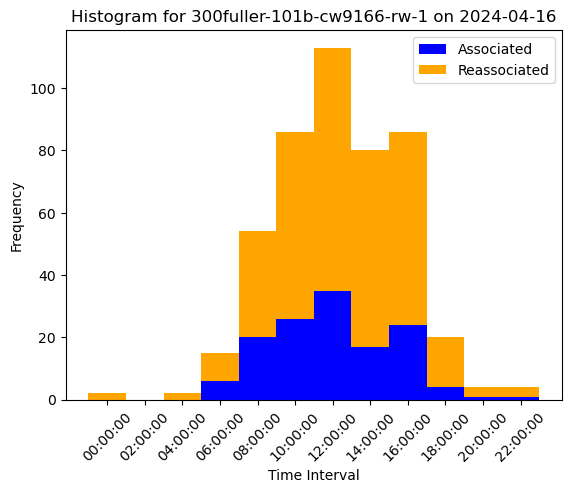

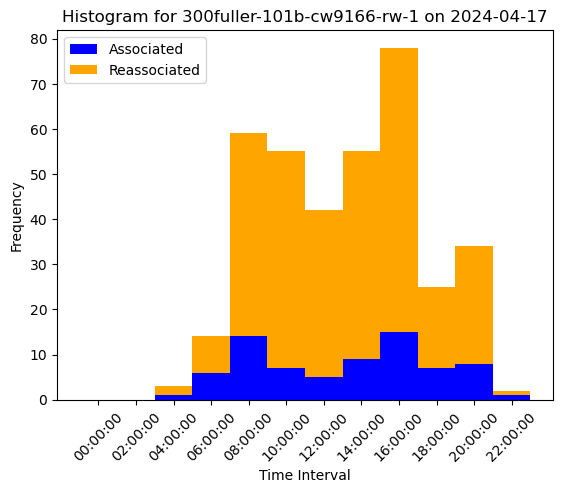

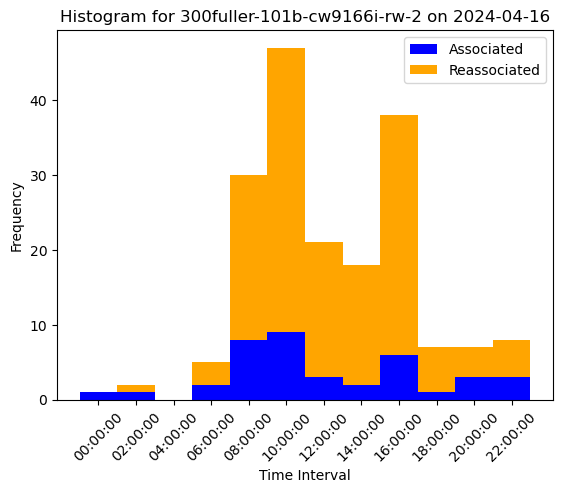

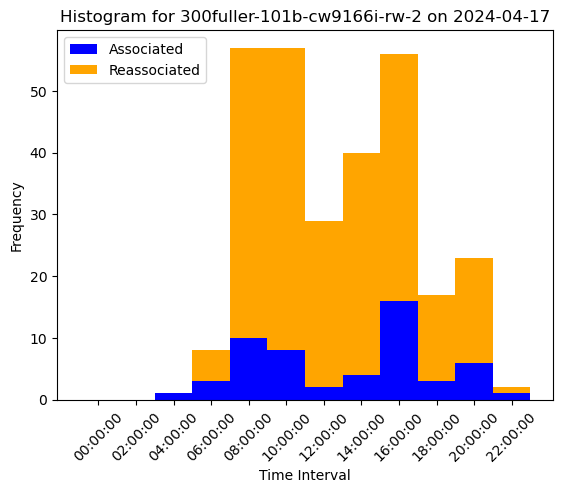

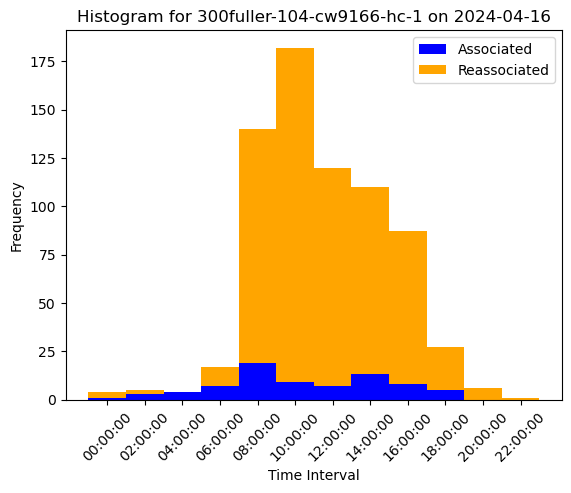

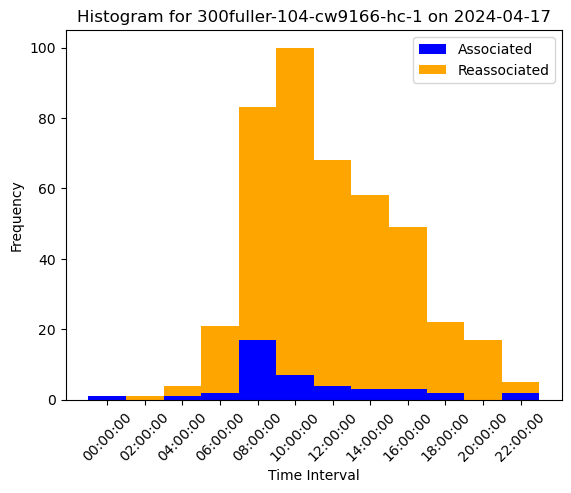

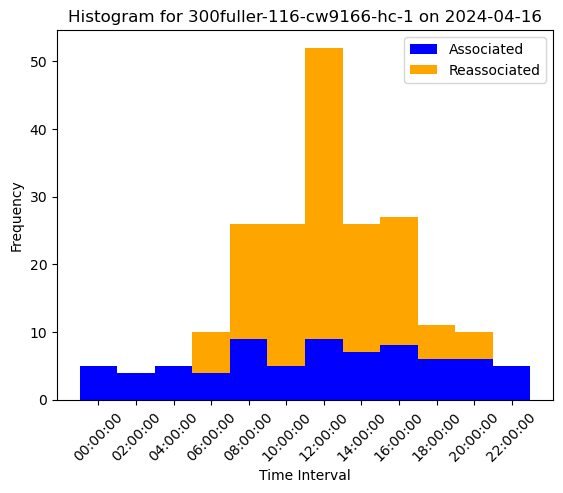

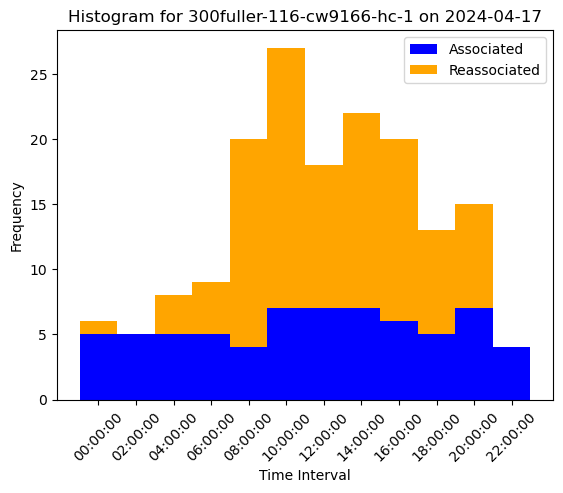

In [139]:
bins = [f"{hour:02}:00:00" for hour in range(0, 24, 2)]
# defining the function the generates the histograms
def histograms(ap_data, ap_name, date):
    date_data = ap_data[np.array([datetime.strptime(ts, "%Y-%m-%d %H:%M:%S%z").date() for ts in ap_data[:, 0]]) == date]
    num_associated = [0] * len(bins)
    num_reassociated = [0] * len(bins)
    for row in date_data:
        time_str, assoc = row[0], row[1]
        time_object = datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S%z").time()
        bin_index = time_object.hour // 2
        if assoc == 'associated':
            num_associated[bin_index] += 1
        elif assoc == 'reassociated':
            num_reassociated[bin_index] += 1
#plotting the histogram
    x = np.arange(len(bins))
    width = 1

    fig, ax = plt.subplots()
    ax.bar(x, num_associated, width, label = 'Associated', color = 'blue')
    ax.bar(x, num_reassociated, width, bottom = num_associated, label = 'Reassociated', color = 'orange')

    ax.set_xlabel('Time Interval')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for {ap_name} on {date}')
    ax.set_xticks(x)
    ax.set_xticklabels(bins, rotation = 45)
    ax.legend()
    plt.show()

# sorts the data based on ap_name and plots histograms for the two dates
for ap_name in unique_ap_names:
    ap_data = time_assoc_reassoc[time_assoc_reassoc[:, 0] == ap_name][:, 1:]

    for date in [datetime.strptime('2024-04-16', '%Y-%m-%d').date(), datetime.strptime('2024-04-17', '%Y-%m-%d').date()]:
        histograms(ap_data, ap_name, date)
    

In [3]:
import numpy as np
from collections import defaultdict
from datetime import datetime

# Load the data from the CSV file
data1 = np.loadtxt("ph-sample.csv", delimiter=",", dtype=str)

# Remove the header
data1 = data1[1:]

# Extract unique AP names
unique_ap_names = np.unique(data1[:, 1])

# This function checks if a netid stays associated throughout the two days
def check_continuous_association(ap_data, netid):
    timestamps = [datetime.strptime(ts, "%Y-%m-%d %H:%M:%S%z") for ts in ap_data[:, 0]]
    assoc_status = ap_data[:, 1]
    start_date = timestamps[0].date()
    end_date = timestamps[-1].date()

    # Checks if netid has entries for both start and end dates
    start_date_entries = [assoc for ts, assoc in zip(timestamps, assoc_status) if ts.date() == start_date]
    end_date_entries = [assoc for ts, assoc in zip(timestamps, assoc_status) if ts.date() == end_date]

    if 'associated' in start_date_entries and 'associated' in end_date_entries:
        return True
    return False

# Stores netids that stay associated for each ap_name
associated_netids = defaultdict(list)

# Loop through each AP name
for ap_name in unique_ap_names:
    ap_data = data1[data1[:, 1] == ap_name][:, [0, 4, 2, 3]]  # Extract relevant columns: time, assoc, netid, ssid

    # Group data by netids
    netids = np.unique(ap_data[:, 2])

    for netid in netids:
        netid_data = ap_data[ap_data[:, 2] == netid]

        if check_continuous_association(netid_data, netid):
            ssid = netid_data[0, 3]  # Assuming ssid doesn't change for a netid
            associated_netids[ap_name].append((netid, ssid))

# Print the results in a tabulated format
for ap_name, netids_ssid_pairs in associated_netids.items():
    print(f"AP Name: {ap_name}")
    print(f"{'NetID':<40} {'SSID':<20}")
    print("-" * 60)
    for netid, ssid in netids_ssid_pairs:
        print(f"{netid:<40} {ssid:<20}")
    print("\n")

        

AP Name: 300fuller-101b-cw9166-rw-1
NetID                                    SSID                
------------------------------------------------------------
0502f68e3c87591e1e49aada000f5a93452f1e6794bc2c74720e25e0ed887387 Dukeblue            
051a3d6f3a53c824c8581fa443f1106758054e8c7f97aa24a81c16e05f581f14 Dukeblue            
0705a874d335ba54c74ae0e182bf3383802c87e58690170c5d3a1c6c247ec958 Dukeblue            
0b5a43c6ddb5988578462ee8d9f71c779434c7f3927df784ec6e74dd7e30faf5 Dukeblue            
0bf983d7d3dc7abf2bf19c60dac28f441e902c0197c5a7918d3ba0f710cc9afc Dukeblue            
13bab6c77cbf9aae634f8d979242be3b0e3fd73d2933bb7e4a224e4cf725bf03 Dukeblue            
15248ed79a09d5d5f0744bf38fabc9c878e6336c4ce85315bd1aac7c4f94f094 Dukeblue            
16b10194278be25730a29b5ed9a7787a39cbb9b9b2c95c890b671d44fe54b659 eduroam             
1960109b49261f41b6ebf941ea91c4b3aef858e5d97423a41e3597e3637d9e7f Dukeblue            
19fcda6467ca09661a3276d1292a3f66c7d9e9eea79d18f05b8d078c4ed41c22 Du